# Eksperyment prostych deskryptorów kształtu

## Porównywanie do wzorca - wszystkie deskryptory

In [2]:
import shape_classifier as sc
import simple_shape_descriptors as ssd
from sklearn.metrics import classification_report

In [3]:
X_train, y_train, X_test, y_test = ssd.prepare_dataset()

In [4]:
clf = sc.ShapeClassifier()
clf.fit(X_train, y_train)

In [5]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

       01_bmw       1.00      0.23      0.38        13
       02_kia       0.67      0.67      0.67        12
03_mitsubishi       0.17      0.29      0.21        14
     04_volvo       0.50      0.50      0.50         8
  05_peugeout       0.08      0.12      0.10         8
     06_honda       0.06      0.12      0.08         8
    07_subaru       0.42      0.33      0.37        15
     08_tesla       0.57      0.33      0.42        12
   09_renault       0.08      0.12      0.10         8
    10_toyota       0.20      0.07      0.11        14

     accuracy                           0.29       112
    macro avg       0.37      0.28      0.29       112
 weighted avg       0.40      0.29      0.30       112



In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '01_bmw'),
  Text(1, 0, '02_kia'),
  Text(2, 0, '03_mitsubishi'),
  Text(3, 0, '04_volvo'),
  Text(4, 0, '05_peugeout'),
  Text(5, 0, '06_honda'),
  Text(6, 0, '07_subaru'),
  Text(7, 0, '08_tesla'),
  Text(8, 0, '09_renault'),
  Text(9, 0, '10_toyota')])

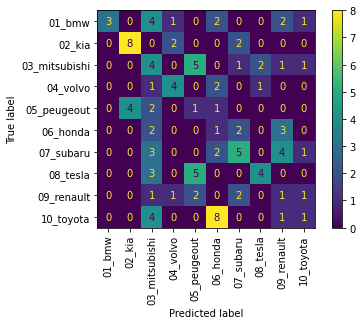

In [7]:
conf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(clf, X_test, y_test)
plt.xticks(rotation=90)

## Dokładności deskryptorów

In [8]:
from sklearn.metrics import accuracy_score
descriptor_names = ['area', 'perimeter', 'diameter', 'solidity', 'compactness', 'roundness', 'eccentricity']
for idx, name in enumerate(descriptor_names):
    clf = sc.ShapeClassifier(limited=idx)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(name, accuracy_score(y_test, y_pred))

area 0.2857142857142857
perimeter 0.1875
diameter 0.25
solidity 0.4375
compactness 0.5892857142857143
roundness 0.5892857142857143
eccentricity 0.6964285714285714


## Drzewo decyzyjne

In [9]:
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

X_train_descriptors = [sc.ShapeClassifier.calculate_shape_descriptors(x) for x in X_train]
X_test_descriptors = [sc.ShapeClassifier.calculate_shape_descriptors(x) for x in X_test]

0 | 1 | 2 | 3 | 4 | 5 | 6 
---|---|---|---|---|--|---
area | perimeter | diameter | solidity | compactness | roundness | eccentricity

In [10]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_descriptors, y_train)

In [11]:
y_pred = clf.predict(X_test_descriptors)
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

       01_bmw       1.00      0.92      0.96        13
       02_kia       0.91      0.83      0.87        12
03_mitsubishi       1.00      1.00      1.00        14
     04_volvo       1.00      0.75      0.86         8
  05_peugeout       0.53      1.00      0.70         8
     06_honda       0.67      1.00      0.80         8
    07_subaru       0.70      0.47      0.56        15
     08_tesla       1.00      0.67      0.80        12
   09_renault       0.33      0.50      0.40         8
    10_toyota       1.00      0.86      0.92        14

     accuracy                           0.79       112
    macro avg       0.81      0.80      0.79       112
 weighted avg       0.85      0.79      0.80       112



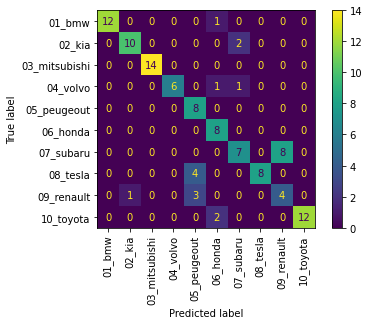

In [15]:
plot_confusion_matrix(clf, X_test_descriptors, y_test)
plt.xticks(rotation=90)
plt.savefig("confusion.eps")

In [13]:
from sklearn import tree
print(tree.export_graphviz(clf))

digraph Tree {
node [shape=box] ;
0 [label="X[4] <= 14.322\ngini = 0.9\nsamples = 20\nvalue = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]"] ;
1 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0, 0, 0, 0, 0, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[6] <= 0.96\ngini = 0.889\nsamples = 18\nvalue = [0, 2, 2, 2, 2, 2, 2, 2, 2, 2]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 2, 0, 0, 0, 0, 0]"] ;
2 -> 3 ;
4 [label="X[5] <= 1.169\ngini = 0.875\nsamples = 16\nvalue = [0, 2, 2, 2, 0, 2, 2, 2, 2, 2]"] ;
2 -> 4 ;
5 [label="gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 2, 0, 0, 0, 0]"] ;
4 -> 5 ;
6 [label="X[5] <= 1.224\ngini = 0.857\nsamples = 14\nvalue = [0, 2, 2, 2, 0, 0, 2, 2, 2, 2]"] ;
4 -> 6 ;
7 [label="gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 2]"] ;
6 -> 7 ;
8 [label="X[4] <= 15.756\ngini = 0.833\nsamples = 12\nvalue = [0, 2, 2, 2, 0, 0, 2, 2, 2, 0]"] ;
6 ->